# Gradientes de Vectores y Matrices

En este Notebook exploramos como realizar los gradientes de funciones usando JAX o de manera simbolica usando SymPy.

# JAX

JAX es una libreria de Google para realizar diferenciación atomática de funciones en Python. 
https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as np
from jax import grad #Solo funciona con funciones con salida escalar
from jax import jacfwd, jacrev
from jax.numpy import linalg

$$
f(x ; y)=\left[\begin{array}{l}
f_{1}(x, y) \\
f_{2}(x, y)
\end{array}\right]=\left[\begin{array}{c}
x^{3} y^{2} \\
2 x y+\cos (x)
\end{array}\right]
$$

In [ ]:
def f1(x):
  return np.array([x[0]**3*x[1]**2, 2*x[0]*x[1]+np.cos(x[0])])

In [ ]:
f1(np.array([0.1,2.0]))

DeviceArray([0.004    , 1.3950042], dtype=float32)

In [ ]:
gf1 = jacfwd(f1)
gf1(np.array([0.1,2.0]))

DeviceArray([[0.12     , 0.004    ],
             [3.9001665, 0.2      ]], dtype=float32)

$$
\mathbf{y}=\mathbf{A} \mathbf{x}(\mathbf{z})
$$

$$
\frac{\partial \mathbf{y}}{\partial \mathbf{z}} = \mathbf {A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}}
$$

In [ ]:
A = np.arange(9, dtype=np.float32).reshape(3,3)
def mv(z):
    x = np.array([z[0]**2+z[1],z[2],z[2]+z[0]])
    return A@x

def xz(z):
    return np.array([z[0]**2+z[1],z[2],z[2]+z[0]])

In [ ]:
z = np.arange(3, dtype=np.float32)
gmxz = jacfwd(mv)
print(gmxz(z))

[[ 2.  0.  3.]
 [ 5.  3.  9.]
 [ 8.  6. 15.]]


In [ ]:
gmv = jacfwd(mv)
print(gmv(z))

[[ 2.  0.  3.]
 [ 5.  3.  9.]
 [ 8.  6. 15.]]


In [ ]:
gxz = jacfwd(xz)
A@gxz(z)

DeviceArray([[ 2.,  0.,  3.],
             [ 5.,  3.,  9.],
             [ 8.,  6., 15.]], dtype=float32)

$$
\alpha=\mathbf{y}^{\top} \mathbf{A} \mathbf{x}
$$
$$
\begin{aligned}
&\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{y}^{\top} \mathbf{A} \\
&\frac{\partial \alpha}{\partial \mathbf{y}} = \mathbf{A x}
\end{aligned}
$$

In [ ]:
def mv(x,y):
    return np.dot(y,np.matmul(A,x))

x = np.arange(3, dtype=np.float32)
y = np.arange(3, dtype=np.float32)

# Gradiente con respecto a x
print(y@A,grad(mv,0)(x,y))

# Gradiente con respecto a y
print(A@x,grad(mv,1)(x,y))

[15. 18. 21.] [15. 18. 21.]
[ 5. 14. 23.] [ 5. 14. 23.]


$$
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x}
$$
$$
\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{x}^{\top}\left(\mathbf{A}+\mathbf{A}^{\top}\right)
$$

In [ ]:
# quad es una funcion escalar, podemos usar grad
def quad(x):
    return np.dot(x,np.matmul(A,x))

print(x@(A+A.T),grad(quad)(x))

[20. 32. 44.] [20. 32. 44.]


$$
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x}
$$

$$
\frac{\partial \alpha}{\partial \mathbf{x}}=2 \mathbf{x}^{\top} \mathbf{A}
$$

In [ ]:
# B representa la matriz simétrica
B = A+A.T
def msime(x):
    return np.dot(x,np.matmul(B,x))

print(2.0*x@B,grad(msime)(x))

[40. 64. 88.] [40. 64. 88.]


## Gradiente de la Inversa

$$
\frac{\partial \mathbf{A}^{-1}}{\partial \alpha}=-\mathbf{A}^{-1} \frac{\partial \mathbf{A}}{\partial \alpha} \mathbf{A}^{-1}
$$

In [ ]:
# Creamos una funcion "A" que crea una matriz que depende de un parametro "a"
def A(a):
    return np.array([[a,0.,0.],[0.,2.0*a,0.0],[0.,0.,np.sqrt(a)]])

# La inversa de A, ya que es diagonal es facil
def invA(a):
    return np.array([[1./a,0.,0.],[0.,1./(2.0*a),0.0],[0.,0.,1.0/np.sqrt(a)]])

a = 2.0
print(-linalg.solve(A(a),linalg.solve(A(a).T,jacfwd(A)(a)).T),'\n \n',jacfwd(invA)(a),
      '\n \n', -invA(a)@jacfwd(A)(a)@invA(a))

[[-0.25       -0.         -0.        ]
 [-0.         -0.125      -0.        ]
 [-0.         -0.         -0.17677668]] 
 
 [[-0.25       0.         0.       ]
 [ 0.        -0.125      0.       ]
 [ 0.         0.        -0.1767767]] 
 
 [[-0.25       -0.         -0.        ]
 [-0.         -0.125      -0.        ]
 [-0.         -0.         -0.17677668]]


## Hessian using JAX

In [ ]:
def f(x) : return x[0]**2 - x[1]**2
gradf = grad(f)
gradf(np.array([2.0, -1.0]))

DeviceArray([4., 2.], dtype=float32)

In [ ]:
gradf(np.array([0.0, 0.0]))

DeviceArray([0., 0.], dtype=float32)

In [ ]:
Hf = jacfwd(jacrev(f))
Hf(np.array([0.0, 0.0]))

DeviceArray([[ 2.,  0.],
             [ 0., -2.]], dtype=float32)

# Using SymPy

In [ ]:
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi
X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
Y = Matrix([rho, phi])
X.jacobian(Y)

Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)],
[   2*rho,             0]])

In [ ]:
X = Matrix([rho*cos(phi), rho*sin(phi)])
X.jacobian(Y)

Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)]])

$$
f(x ; y)=\left[\begin{array}{l}
f_{1}(x, y) \\
f_{2}(x, y)
\end{array}\right]=\left[\begin{array}{c}
x^{3} y^{2} \\
2 x y+\cos (x)
\end{array}\right]
$$

In [ ]:
from sympy.abc import x, y
f = Matrix([x**3*y**2, 2*x*y+cos(x)])
print(f)

Matrix([[x**3*y**2], [2*x*y + cos(x)]])


In [ ]:
vector = Matrix([x, y])
f.jacobian(vector)

Matrix([
[ 3*x**2*y**2, 2*x**3*y],
[2*y - sin(x),      2*x]])

In [ ]:
from sympy.abc import theta, r
from sympy import simplify
f2 = Matrix([r*cos(theta), r*sin(theta)])
vector2 = Matrix([r, theta])
jac2 = f2.jacobian(vector2)
print(simplify(jac2.det()))

r


## Hessiana: Ejemplo

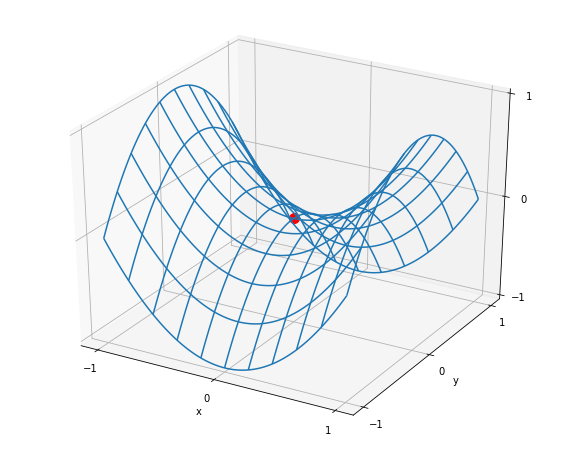

In [ ]:
x, y = np.meshgrid(np.linspace(-1.0, 1.0, 101), np.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = plt.figure(figsize=(10,8)).add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'ro', markersize = 10)
ticks = [-1, 0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
gz = np.array([2.0*x, - 2.0*y])
Hz = np.array([[2.0, 0.0],[0.0,-2.0]])

In [ ]:
np.linalg.eigvals(Hz)

DeviceArray([ 2.+0.j, -2.+0.j], dtype=complex64)